### Predicting Heart Failure Mortality

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.
Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.

Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

https://www.kaggle.com/datasets/whenamancodes/heart-failure-clinical-records?resource=download

In [1]:
import pandas as pd # PANel DAta
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb
from pandas.plotting import scatter_matrix

In [2]:
%matplotlib inline

In [3]:
#read data in via Pandas
df = pd.read_csv('Heart Failure Clinical Records.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
# Structure
df.shape

(299, 13)

In [5]:
# type
type(df)

pandas.core.frame.DataFrame

In [6]:
# Check for missing values
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [7]:
%whos

Variable         Type         Data/Info
---------------------------------------
df               DataFrame          age  anaemia  creat<...>\n[299 rows x 13 columns]
mpl              module       <module 'matplotlib' from<...>/matplotlib/__init__.py'>
np               module       <module 'numpy' from '/Us<...>kages/numpy/__init__.py'>
pd               module       <module 'pandas' from '/U<...>ages/pandas/__init__.py'>
plt              module       <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
sb               module       <module 'seaborn' from '/<...>ges/seaborn/__init__.py'>
scatter_matrix   function     <function scatter_matrix at 0x7fb77bd03430>


In [8]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


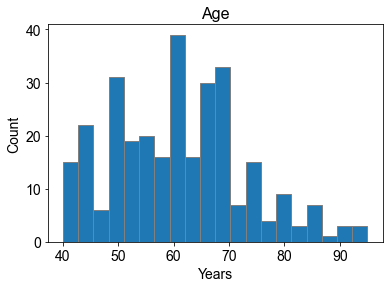

In [10]:
plt.hist(df['age'], bins=20,edgecolor='gray')
plt.title('Age',fontsize=16)
plt.xlabel('Years',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.tick_params(axis='both', labelsize=14)
#fig.savefig('age.pdf')not saving properly
plt.style.use('seaborn-whitegrid')
#plt.show()

/Users/imac/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

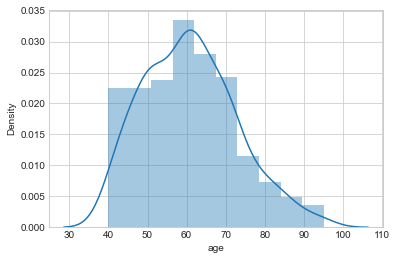

In [11]:
sb.distplot(df['age'])

In [12]:
cv = df[['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time']]

Text(0, 0.5, 'Platelets')

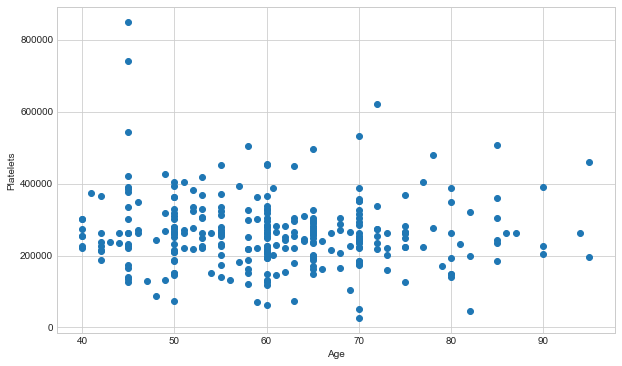

In [13]:
fig, ax = plt.subplots(figsize=(10,6))
# fig = plt.figure
# ax = plt.axes()
ax.scatter(x=df['age'], y=df['platelets'])
plt.xlabel('Age')
plt.ylabel('Platelets')
#plt.show()

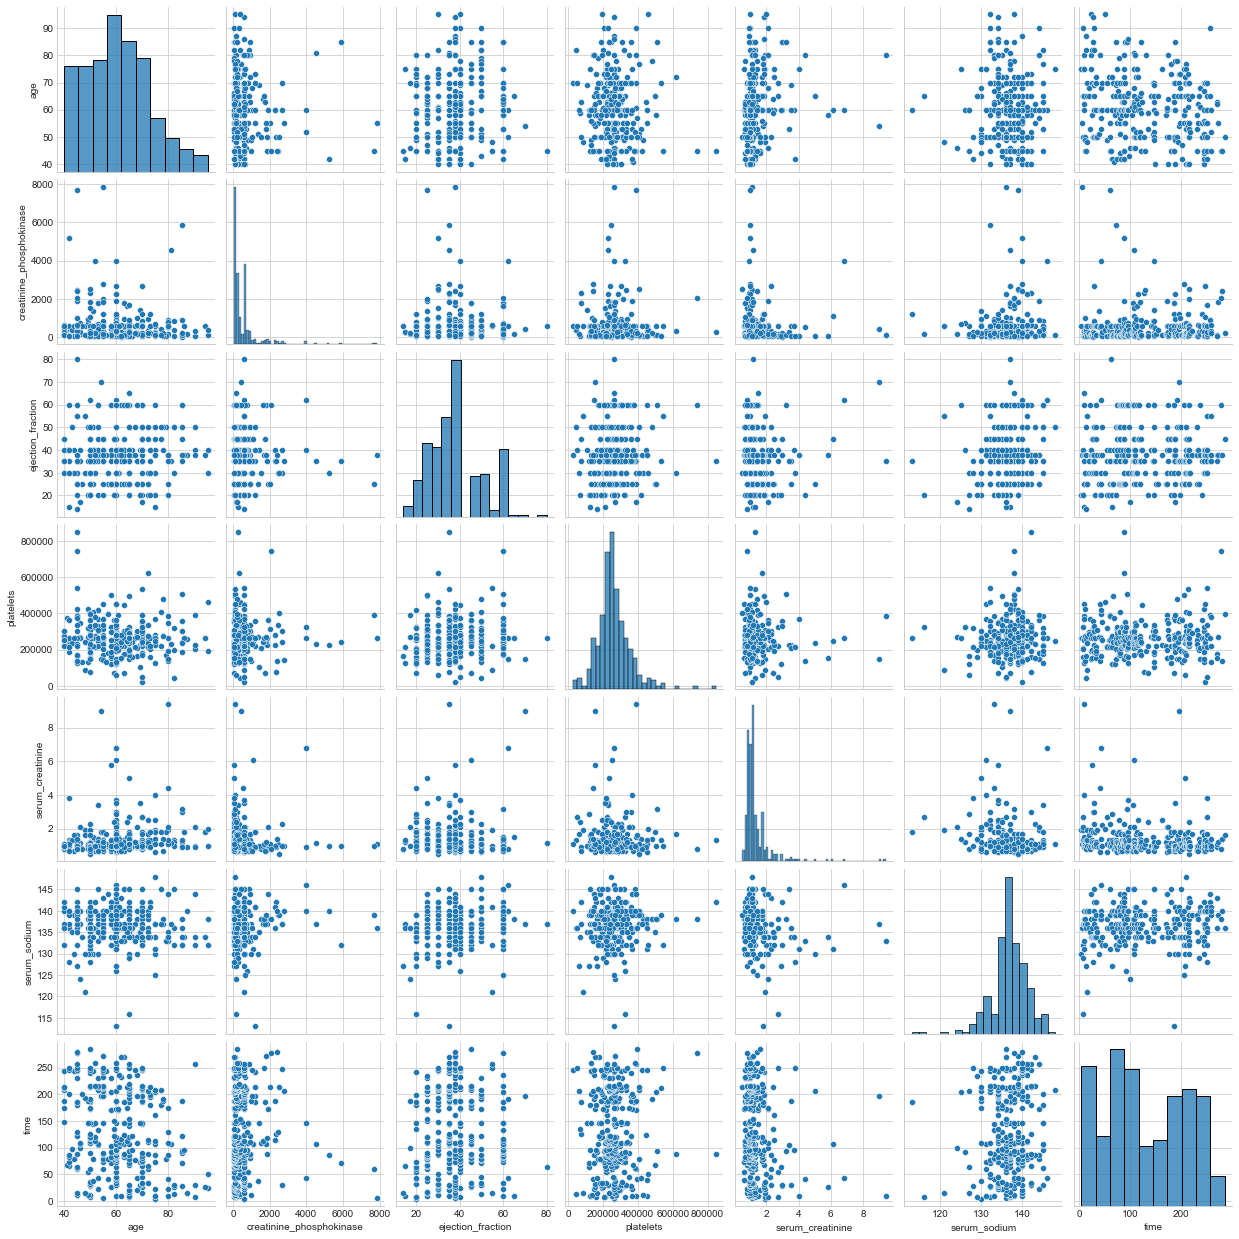

In [14]:
sb.pairplot(cv)

In [15]:
fig.savefig('scatter.png')

In [16]:
!pwd

/Users/imac/Desktop/ANA500/project


In [17]:
!ls

ANA500
ANA500_W1.ipynb
Grothe_ANA500_Micro-Project.pptx
Heart Failure Clinical Records.csv
README.md
Screen Shot 2022-10-03 at 4.18.33 PM.png
Untitled.ipynb
repo
scatter.png


<AxesSubplot:xlabel='DEATH_EVENT', ylabel='age'>

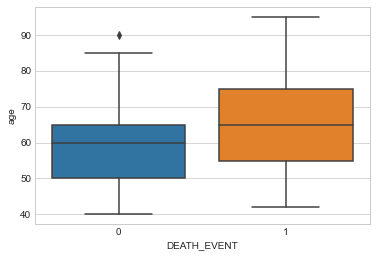

In [18]:
sb.boxplot(x=df['DEATH_EVENT'], y=df['age'])

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='smoking'>

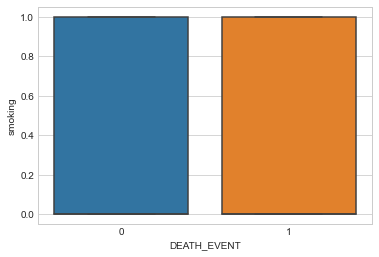

In [19]:
sb.boxplot(x=df['DEATH_EVENT'], y=df['smoking'])

In [20]:
plt.gcf()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

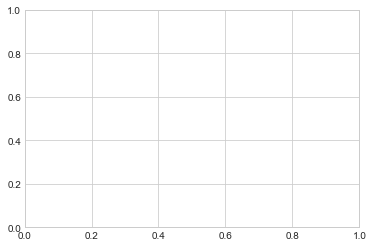

In [21]:
plt.gca()

In [22]:
plt.show()